In [4]:
import os 
import numpy
import matplotlib
import matplotlib.pyplot

In [1]:
!ls 

DQN.ipynb       PPO.ipynb       SAC.ipynb       aggregate.ipynb logs


File not found for ppo on MountainCarContinuous-v0. Skipping...
File not found for ppo on Pendulum. Skipping...
File not found for dqn on CartPole. Skipping...
File not found for dqn on MountainCarContinuous-v0. Skipping...
File not found for dqn on Pendulum. Skipping...
File not found for sac on CartPole. Skipping...
File not found for sac on MountainCar-v0. Skipping...
File not found for sac on MountainCarContinuous-v0. Skipping...
File not found for sac on Acrobot-v1. Skipping...
File not found for sac on Pendulum. Skipping...
File not found for td3 on CartPole. Skipping...
File not found for td3 on MountainCar-v0. Skipping...
File not found for td3 on MountainCarContinuous-v0. Skipping...
File not found for td3 on Acrobot-v1. Skipping...
File not found for td3 on Pendulum. Skipping...


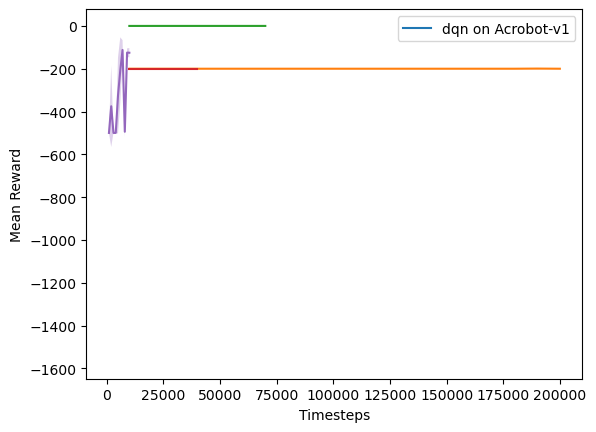

In [10]:
matplotlib.pyplot.figure()

for algo in ['ppo', 'dqn', 'sac', 'td3']:
    for env in ["CartPole", "MountainCar-v0", "MountainCarContinuous-v0", "Acrobot-v1", "Pendulum"]:
        exists = os.path.exists(os.path.join(f"./logs/{algo}/{env}/", "evaluations.npz"))
        if not exists:
            print(f"File not found for {algo} on {env}. Skipping...")
            continue
            
        data = numpy.load(os.path.join(f"./logs/{algo}/{env}/", "evaluations.npz"))

        # Extract the relevant data
        timesteps = data['timesteps']
        results = data['results']

        # Calculate the mean and standard deviation of the results
        mean_results = numpy.mean(results, axis=1)
        std_results = numpy.std(results, axis=1)

        # Plot the results
        matplotlib.pyplot.plot(timesteps, mean_results)
        matplotlib.pyplot.fill_between(timesteps,
                                    mean_results - std_results,
                                    mean_results + std_results,
                                    alpha=0.3)

        matplotlib.pyplot.xlabel('Timesteps')
        matplotlib.pyplot.ylabel('Mean Reward')
        matplotlib.pyplot.legend([f"{algo} on {env}"])
        
        
matplotlib.pyplot.show()
    
